<a href="https://colab.research.google.com/github/armanalam6342/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##<b> Import Modules

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix


## <b> Loading the dataset

In [66]:
data = pd.read_excel("/content/drive/MyDrive/default of credit card clients.xls")

In [67]:
# Copy data for backup
df = data.copy()

In [68]:
# Checking top 5 rows of the data
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


#<b> Preprocessing

In [69]:
# Droping 'Unnamed: 0' column 
df.drop(columns='Unnamed: 0',inplace=True)

In [70]:
# creating list of columns name for renaming data frame column names
columns = ['Limit_bal','Gender','Education','Marital_status','Age','Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May',
           'Repayment_April','Sep_Bill','Aug_Bill','July_Bill','June_Bill','May_Bill','Apr_Bill','Pay_Sep','Pay_Aug','Pay_July','Pay_June','Pay_May','Pay_April','Defaulter'] 

In [71]:
 # replace column name with columns list
df.set_axis(columns, axis=1, inplace=True)

In [72]:
# droping the axis 0
df=df.drop(0,axis=0).reset_index(drop=True)

In [73]:
df.head()

,Limit_bal,Gender,Education,Marital_status,Age,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [74]:
# Checking the shape of data
df.shape

(30000, 24)

In [75]:
# checking information about each column, but all columns dtype is in object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Limit_bal            30000 non-null  object
 1   Gender               30000 non-null  object
 2   Education            30000 non-null  object
 3   Marital_status       30000 non-null  object
 4   Age                  30000 non-null  object
 5   Repayment_September  30000 non-null  object
 6   Repayment_August     30000 non-null  object
 7   Repayment_July       30000 non-null  object
 8   Repayment_June       30000 non-null  object
 9   Repayment_May        30000 non-null  object
 10  Repayment_April      30000 non-null  object
 11  Sep_Bill             30000 non-null  object
 12  Aug_Bill             30000 non-null  object
 13  July_Bill            30000 non-null  object
 14  June_Bill            30000 non-null  object
 15  May_Bill             30000 non-null  object
 16  Apr_

In [76]:
# Converting all columns from Object to int 
for i in df.columns:
  df[i]=df[i].astype('int')

In [77]:
# Describing data set
df.describe()

,Limit_bal,Gender,Education,Marital_status,Age,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.
Education level is mostly graduate school (1) and university (2). Most of the clients are either marrined or single (less frequent the other status). Average age is 35.5 years, with a standard deviation of 9.2 years.

In [78]:
# Checking duplicates in the data
# we have duplicates of non defaulter - 29 and defaulter 6
duplicates = df[df.duplicated()]
duplicates.Defaulter.value_counts()

0    29
1     6
Name: Defaulter, dtype: int64

In [79]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [80]:
# Checking null values. So we don't have any missing values
df.isnull().sum()

Limit_bal              0
Gender                 0
Education              0
Marital_status         0
Age                    0
Repayment_September    0
Repayment_August       0
Repayment_July         0
Repayment_June         0
Repayment_May          0
Repayment_April        0
Sep_Bill               0
Aug_Bill               0
July_Bill              0
June_Bill              0
May_Bill               0
Apr_Bill               0
Pay_Sep                0
Pay_Aug                0
Pay_July               0
Pay_June               0
Pay_May                0
Pay_April              0
Defaulter              0
dtype: int64

So we don't have any missing value

#<b> Feature Engineering on Categorical Feature

In [81]:
# Value count of Gender Column
df.Gender.value_counts()

2    18091
1    11874
Name: Gender, dtype: int64

In [82]:
# converting Gender 1 & 2 value in Male & Female for better understanding  
df['Gender'] = df['Gender'].apply(lambda x:'Male'  if x == 1 else 'Female')

In [83]:
# Value count of Education Column
df.Education.value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: Education, dtype: int64

In data given values are  1 = graduate school; 2 = university; 3 = high school; 4 = others so all other are not given in data we include them on others

In [84]:
# 
df['Education']=df['Education'].apply(lambda x :'graduate' if x==1 else ('university' if x==2 else ('high school' if x==3  else 'others')))

In [85]:
# Value count of Marital_status Column
df.Marital_status.value_counts()

2    15945
1    13643
3      323
0       54
Name: Marital_status, dtype: int64

data given values are 1 = married; 2 = single; 3 = others so 0 is  not given in data, we include them on others

In [86]:
# 
df['Marital_status']=df['Marital_status'].apply(lambda x : "married" if x==1 else ("single" if x==2 else 'others'))

In [87]:
# Value count percentage of Age Column
df.Age.value_counts(normalize=True)

29    0.053462
27    0.049224
28    0.046921
30    0.046521
26    0.041782
31    0.040481
25    0.039546
34    0.038745
32    0.038612
33    0.038245
24    0.037577
35    0.037143
36    0.036943
37    0.034741
39    0.031737
38    0.031470
23    0.031036
40    0.029034
41    0.027432
42    0.026431
44    0.023361
43    0.022326
45    0.020591
46    0.019022
22    0.018688
47    0.016720
48    0.015551
49    0.014984
50    0.013716
51    0.011347
53    0.010846
52    0.010145
54    0.008243
55    0.006975
56    0.005940
58    0.004071
57    0.004071
59    0.002770
60    0.002236
21    0.002236
61    0.001869
62    0.001468
63    0.001035
64    0.001035
66    0.000834
65    0.000801
67    0.000534
69    0.000501
70    0.000334
68    0.000167
73    0.000133
71    0.000100
72    0.000100
75    0.000100
74    0.000033
79    0.000033
Name: Age, dtype: float64

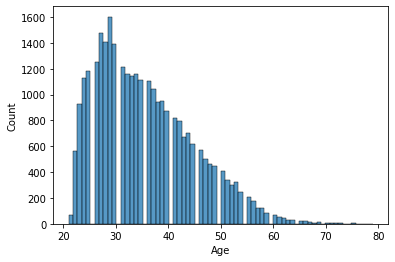

In [88]:
# visualizing the Age column for better understanding with histplot
sns.histplot(df['Age'])

From this hist plot we can divide age into 9 bins

In [89]:
# we are using Bining in Age column
df['Age_group'] = pd.cut(df.Age, bins=[21,25,30,35,40,45,50,55,60,80],labels=['21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61 and Above'])

In [90]:
# droping Age column
df.drop(columns=['Age'],inplace=True)

# Feature Engineering on Repayments status Columns

In [91]:
# creating a new data frame of Repayments status
repayment_df = df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']]

In [92]:
#value counts of all Repayments status Columns 
for i in repayment_df.columns:
  print('column name = ', i)
  print(repayment_df[i].value_counts())

column name =  Repayment_September
 0    14737
-1     5682
 1     3667
-2     2750
 2     2666
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: Repayment_September, dtype: int64
column name =  Repayment_August
 0    15730
-1     6046
 2     3926
-2     3752
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: Repayment_August, dtype: int64
column name =  Repayment_July
 0    15764
-1     5934
-2     4055
 2     3819
 3      240
 4       75
 7       27
 6       23
 5       21
 1        4
 8        3
Name: Repayment_July, dtype: int64
column name =  Repayment_June
 0    16455
-1     5683
-2     4318
 2     3159
 3      180
 4       68
 7       58
 5       35
 6        5
 8        2
 1        2
Name: Repayment_June, dtype: int64
column name =  Repayment_May
 0    16947
-1     5535
-2     4516
 2     2626
 3      178
 4       83
 7       58
 5       17
 6        4
 8        1
Name: Repayment_May, dtype: int64
column name =  

In data description we have not given information about 0 and -2 values 

In [93]:
# Value count percentage of Repayments status columns with respect of Defaulter
for i in repayment_df.columns:
  print('column name = ',i)
  print(df[repayment_df[i]<=0].Defaulter.value_counts(normalize=True))

column name =  Repayment_September
0    0.861625
1    0.138375
Name: Defaulter, dtype: float64
column name =  Repayment_August
0    0.837238
1    0.162762
Name: Defaulter, dtype: float64
column name =  Repayment_July
0    0.82802
1    0.17198
Name: Defaulter, dtype: float64
column name =  Repayment_June
0    0.820381
1    0.179619
Name: Defaulter, dtype: float64
column name =  Repayment_May
0    0.815468
1    0.184532
Name: Defaulter, dtype: float64
column name =  Repayment_April
0    0.813293
1    0.186707
Name: Defaulter, dtype: float64


In [94]:
# Defining function for all Repayments status value less than 0 consider as 0
def repaymentsstatus(delay):
    if delay <= 0:
      return 0
    else:
      return delay

In [95]:
# Apply function on Repayments status columns
for i in repayment_df.columns:
  df[i]=df[i].apply(repaymentsstatus)

In [96]:
# Divide data from its basic feature 
cat_df = df[['Age_group','Gender','Education','Marital_status']]
repayment_df =df[['Repayment_September','Repayment_August','Repayment_July','Repayment_June','Repayment_May','Repayment_April']]
bills_df = df[['Sep_Bill','Aug_Bill', 'July_Bill', 'June_Bill', 'May_Bill', 'Apr_Bill']]
pay_df = df[['Pay_Sep','Pay_Aug', 'Pay_July', 'Pay_June', 'Pay_May', 'Pay_April']]

#<b> EDA 

#<b> Categorical DataFrame

In [97]:
cat_df.head()

,Age_group,Gender,Education,Marital_status
0,21-25,Female,university,married
1,26-30,Female,university,single
2,31-35,Female,university,single
3,36-40,Female,university,married
4,56-60,Male,university,married


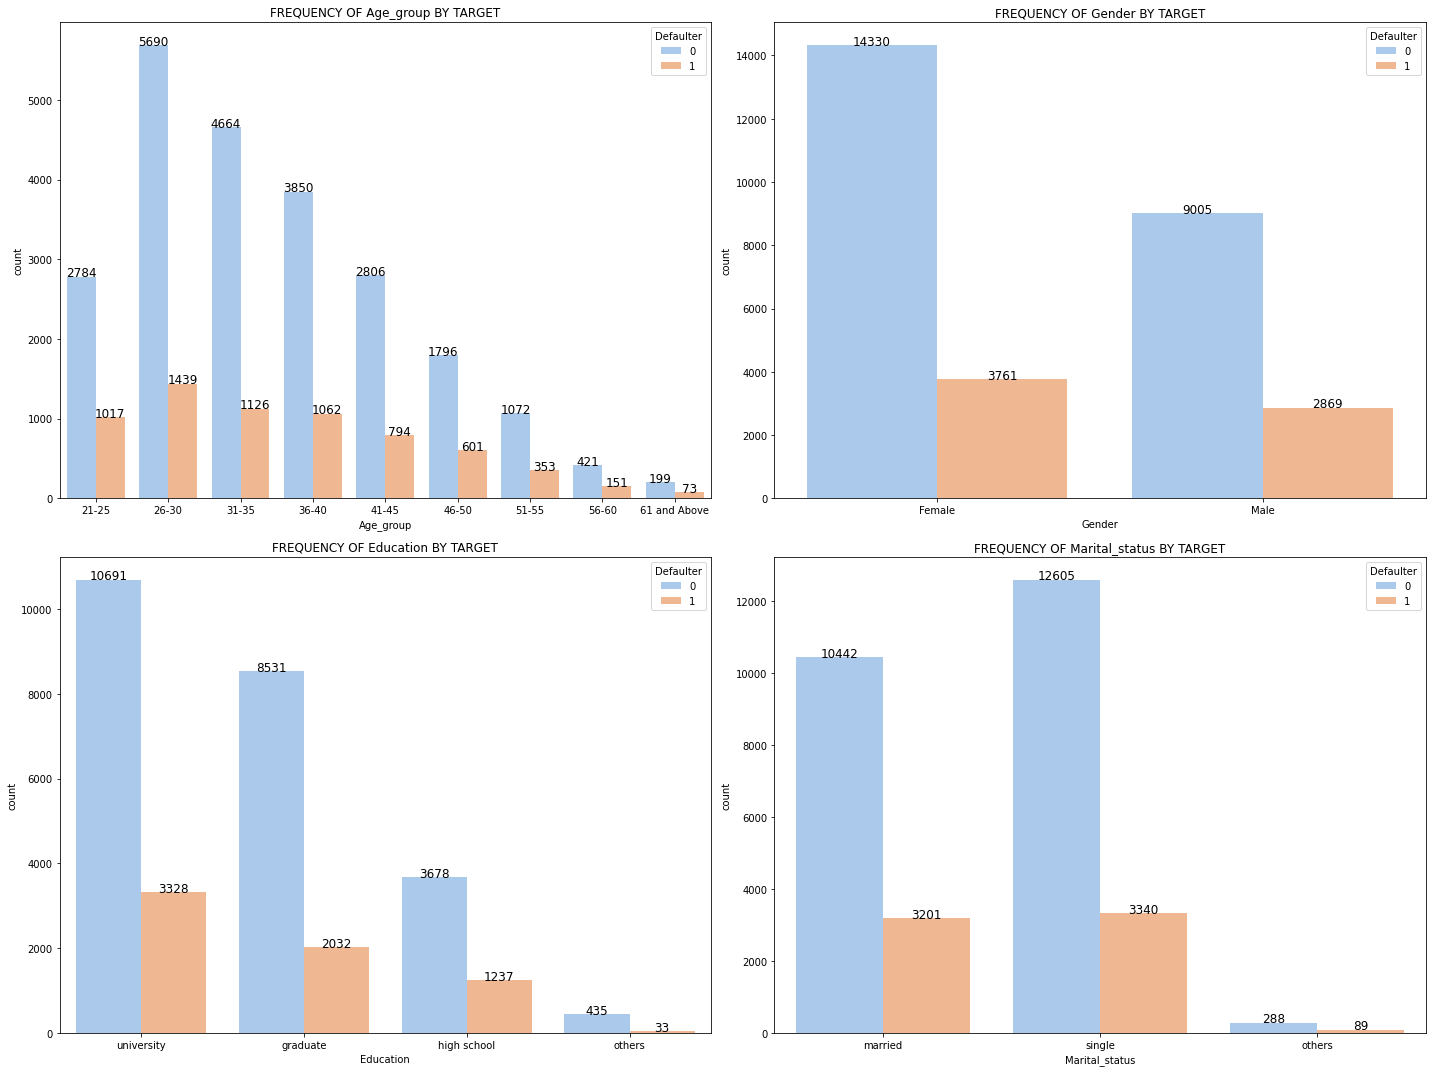

In [98]:
# FREQUENCY OF categorical feature by TARGET
n = 1
plt.figure(figsize=(20,15))
for i in cat_df.columns:
  plt.subplot(2,2,n)
  n=n+1
  ax = sns.countplot(cat_df[i], hue=df["Defaulter"],palette='pastel')
  plt.title(f'FREQUENCY OF {i} BY TARGET')
  plt.tight_layout()
  for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 12)

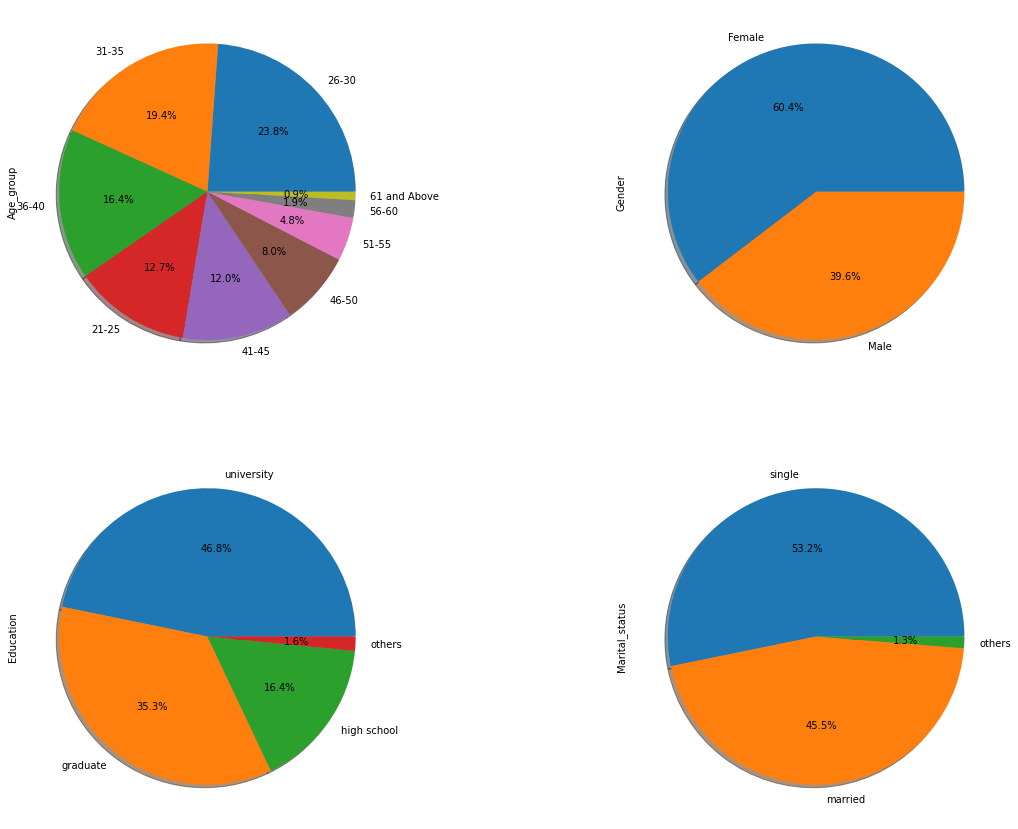

In [99]:
# percentage of value count in each column
n = 1
plt.figure(figsize=(20,15))
for i in cat_df.columns:
  plt.subplot(2,2,n)
  n=n+1
  ax = cat_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)

#<b> Repayment Dataframe

In [100]:
repayment_df.head()

,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April
0,2,2,0,0,0,0
1,0,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [101]:
# Describe repayment df
repayment_df.describe()

,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000
mean,0.356416,0.320340,0.304288,0.258935,0.221625,0.226698
std,0.760752,0.802064,0.790696,0.761200,0.717768,0.715483
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


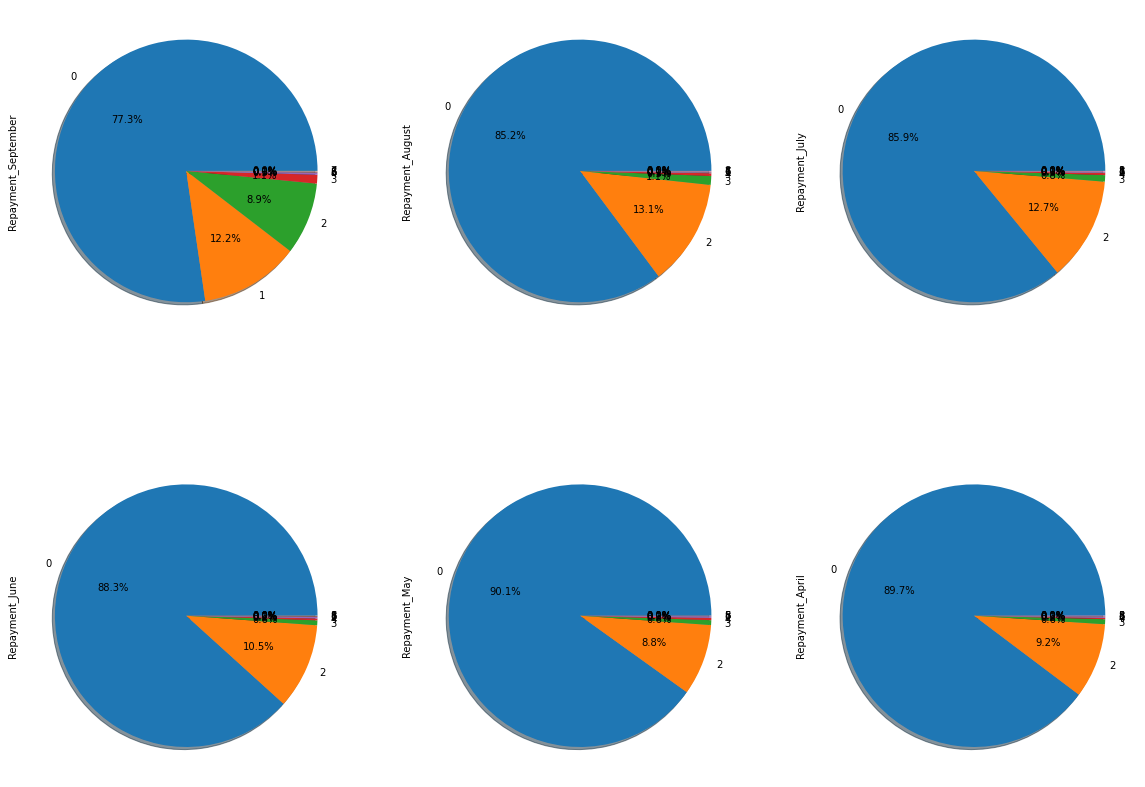

In [102]:
# percentage of value count in each column
n = 1
plt.figure(figsize=(20,15))
for i in repayment_df.columns:
  plt.subplot(2,3,n)
  n=n+1
  ax = repayment_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow=True,)

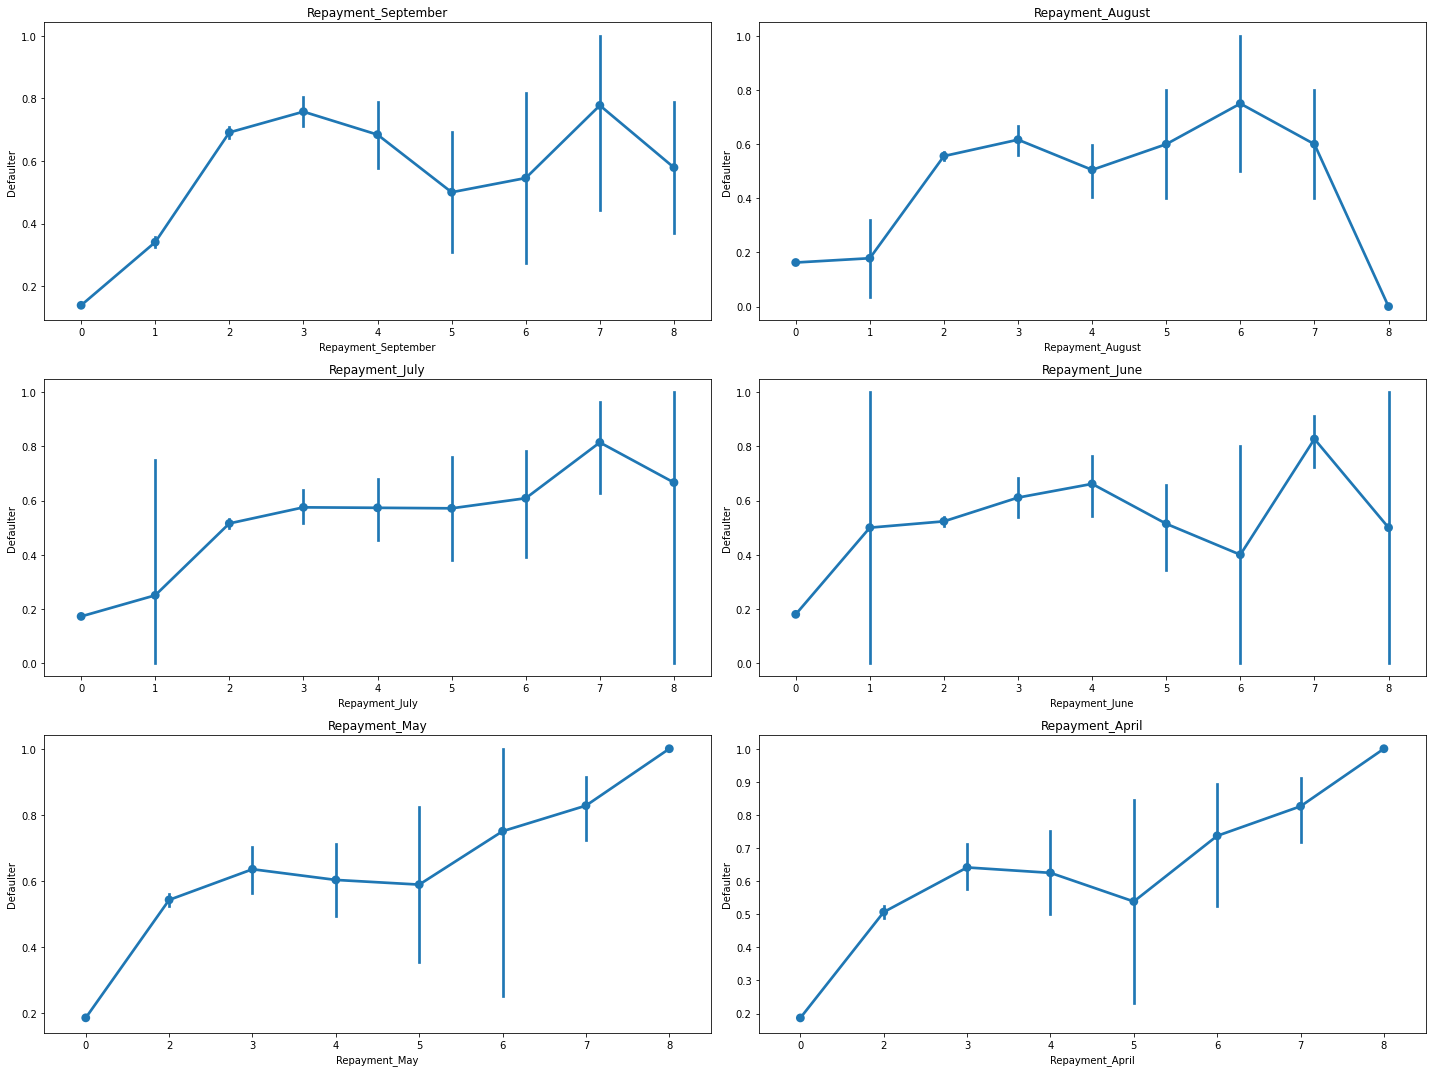

In [103]:
# plt pointplot
n = 1
plt.figure(figsize=(20,15))
for i in repayment_df.columns:
  plt.subplot(3,2,n)
  n=n+1
  sns.pointplot(repayment_df[i],df['Defaulter'])
  plt.title(i)
  plt.tight_layout()

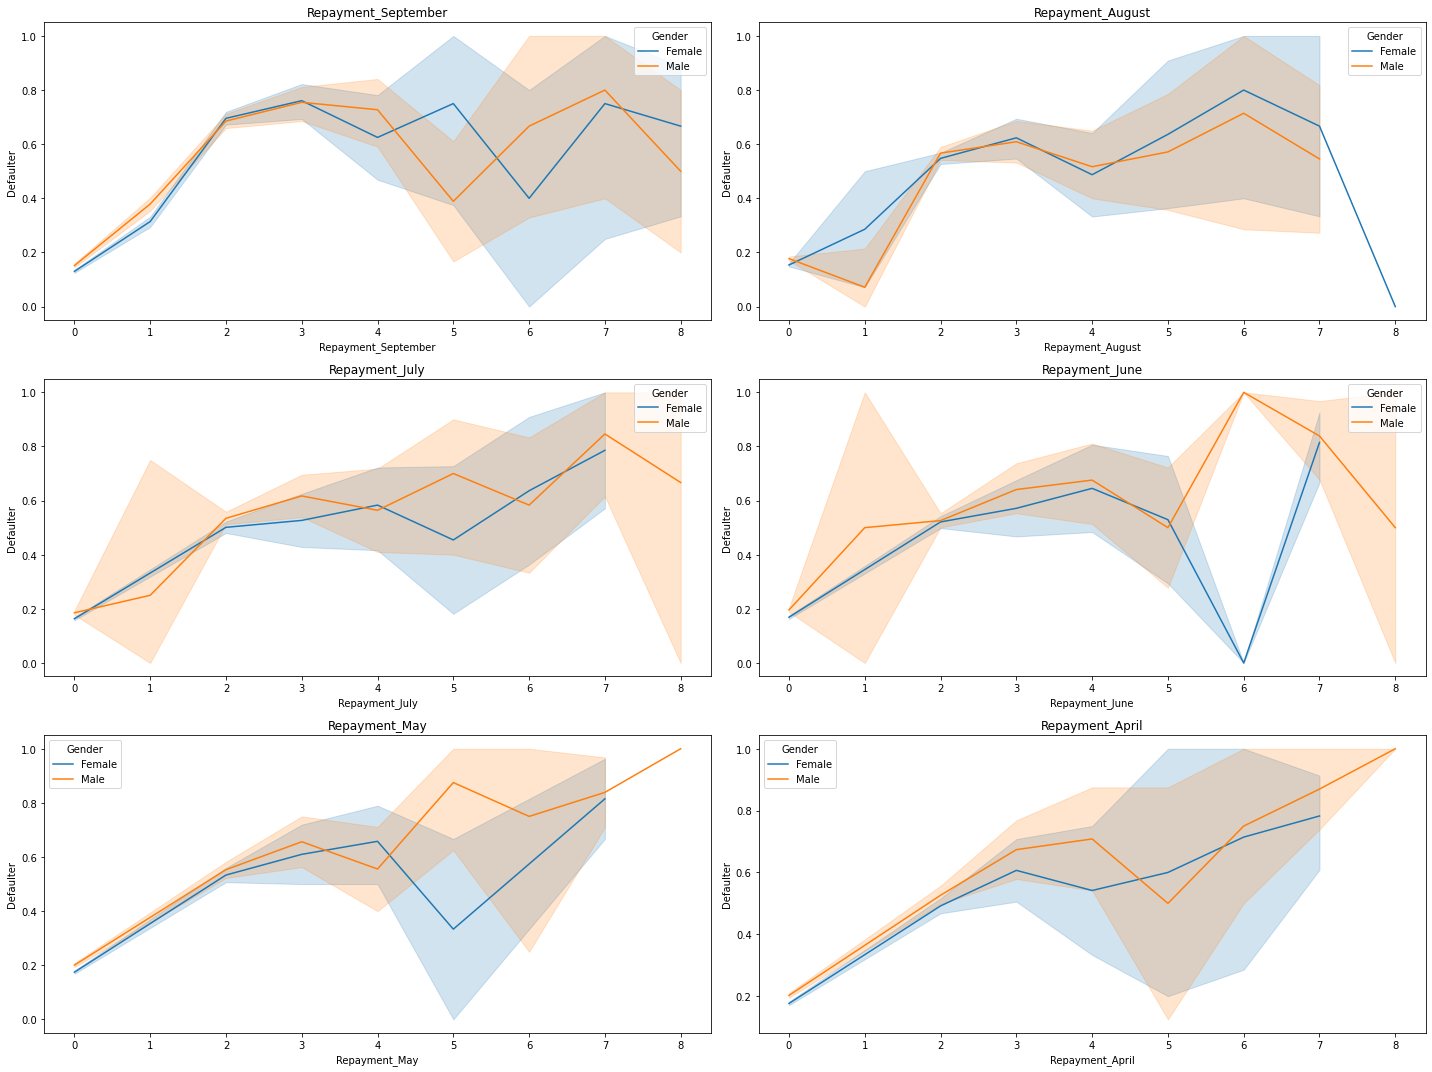

In [104]:
n = 1
plt.figure(figsize=(20,15))
for i in repayment_df.columns:
  plt.subplot(3,2,n)
  n=n+1
  sns.lineplot(repayment_df[i],df['Defaulter'],hue=df['Gender'])
  plt.title(i)
  plt.tight_layout()

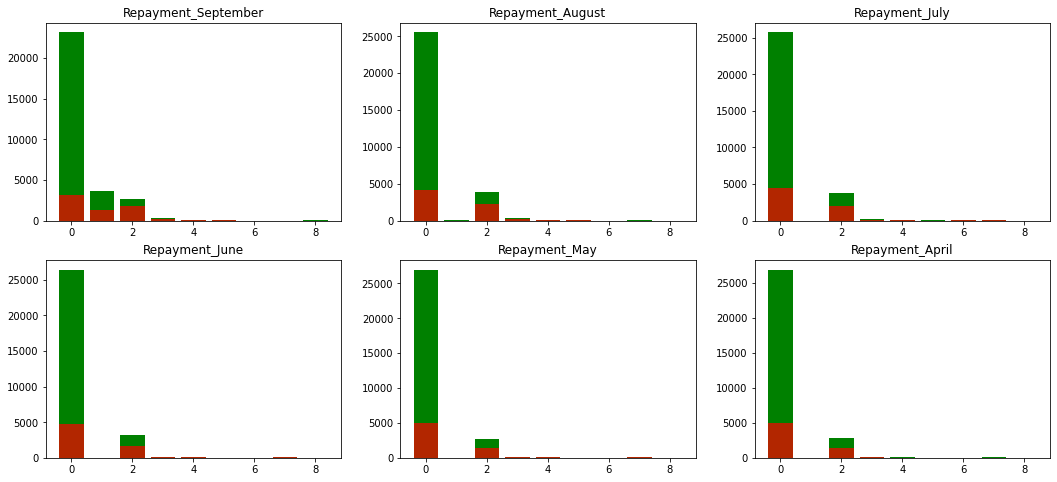

In [105]:
pay_status_columns = repayment_df.columns
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)
for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3
    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['Defaulter']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='green')
    ax[row,col].bar(x.index, x, align='center', color='red', alpha=0.7)
    ax[row,col].set_title(pay_status_columns[i])    
plt.show()

#<b> Bills DataFrame 

In [106]:
bills_df.head()

,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131


In [107]:
bills_df.describe()

,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill
count,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000
mean,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281
std,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000
50%,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000
75%,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [108]:
# maximum billing in each month
max_bill = []
for i in bills_df.columns:
  max = bills_df[i].max()
  max_bill.append(max)

print(max_bill)

[964511, 983931, 1664089, 891586, 927171, 961664]


In [109]:
# maximum billing in each month
min_bill = []
for i in bills_df.columns:
  min = bills_df[i].min()
  min_bill.append(min)

print(min_bill)

[-165580, -69777, -157264, -170000, -81334, -339603]


In [110]:
# Average bill in each Month
avg_bill = []
for i in bills_df.columns:
  avg = bills_df[i].mean()
  min_bill.append(avg)

print(min_bill)

[-165580, -69777, -157264, -170000, -81334, -339603, 51283.00977807442, 49236.36629400968, 47067.91606874687, 43313.32988486568, 40358.33439012181, 38917.012280994495]


In [111]:
# visualization of maximum and minimum billing each month
# plt.figure(figsize=(10,15))
# f, axes = plt.subplots(1, 3)
# sns.barplot(bills_df.columns, max_bill,ax=axes[0])
# sns.barplot(bills_df.columns, min_bill,ax=axes[1])
# sns.barplot(bills_df.columns,list(df[i].mean() for i in bills_df.columns),ax=axes[2])
# plt.tight_layout()

In [112]:
# sns.pairplot(df, vars=bills_df.columns, kind='scatter',hue='Defaulter')

In [113]:
pay_df.head()

,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679


In [114]:
df.head()

,Limit_bal,Gender,Education,Marital_status,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter,Age_group
0,20000,Female,university,married,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-25
1,120000,Female,university,single,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,26-30
2,90000,Female,university,single,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,31-35
3,50000,Female,university,married,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,36-40
4,50000,Male,university,married,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,56-60


In [115]:
# Using One hot encoding on categorical features and storing in new data frame
new_df = pd.get_dummies(df,drop_first=True)

In [116]:
new_df.head()

,Limit_bal,Repayment_September,Repayment_August,Repayment_July,Repayment_June,Repayment_May,Repayment_April,Sep_Bill,Aug_Bill,July_Bill,June_Bill,May_Bill,Apr_Bill,Pay_Sep,Pay_Aug,Pay_July,Pay_June,Pay_May,Pay_April,Defaulter,Gender_Male,Education_high school,Education_others,Education_university,Marital_status_others,Marital_status_single,Age_group_26-30,Age_group_31-35,Age_group_36-40,Age_group_41-45,Age_group_46-50,Age_group_51-55,Age_group_56-60,Age_group_61 and Above
0,20000,2,2,0,0,0,0,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,120000,0,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,50000,0,0,0,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0


In [117]:
# split our data frame to dependent and independent features
X =new_df.drop(columns=['Defaulter'])
y =new_df['Defaulter']

In [146]:
X.shape

(29965, 33)

In [118]:
#importing SMote to make our dataset balanced
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 29965
Resampled dataset shape 46670


In [119]:
# train test spilt data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=0)

In [120]:
#Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def fit_and_score(x_train,x_test,y_train,y_test,X,y):
  log = LogisticRegression(random_state=0)
  knn =KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)
  svc = SVC(kernel='linear',random_state=0)
  svc_rbf = SVC(kernel='rbf',random_state=0)
  gauss = GaussianNB()
  # tree = DecisionTreeClassifier(max_depth=10)
  # forest = RandomForestClassifier(n_estimators=500,random_state=0)
  # ada_boost = AdaBoostClassifier(base_estimator=forest)
  # gradient =GradientBoostingClassifier()
  xgboost = XGBClassifier()
  model = [log,knn,svc,svc_rbf,gauss,xgboost]
  train_score = []
  test_score = []
  Precision_score = []
  Recall_score = []
  F1_score = []


  for i in model:
    i.fit(x_train,y_train)
    train_score.append(i.score(x_train,y_train))
    pred = i.predict(x_test)
    test_score.append(accuracy_score(y_test,pred))
    Precision_score.append(precision_score(y_test,pred))
    Recall_score.append(recall_score(y_test,pred))
    F1_score.append(f1_score(y_test,pred))

  # cv_score=[]
  # for i in model:
  #   cv =np.mean(cross_val_score(i,X,y,cv=10,scoring='accuracy'))
  #   cv_score.append(cv)
    
  

  scores= pd.DataFrame(list(zip(train_score,test_score,Precision_score,Recall_score,F1_score)),index=['Logistic','KNeighbors','SVC Linear','SVC rbf','GaussianNB','Xg boost'],columns=['Train_score','Test_score','Precision','Recall','F1'])
  return scores


In [ ]:
fit_and_score(X_train_scaled,X_test_scaled,y_train,y_test,X,y)

,Train_score,Test_score,Precision,Recall,F1
Logistic,0.809299,0.811978,0.830710,0.782338,0.805798
KNeighbors,0.866322,0.811978,0.829357,0.784272,0.806184
SVC Linear,0.803193,0.806407,0.816544,0.788999,0.802535
SVC rbf,0.820013,0.815620,0.861296,0.751182,0.802479
GaussianNB,0.683576,0.688772,0.634891,0.884401,0.739158
Xg boost,0.832601,0.829334,0.851758,0.796304,0.823098


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

def fit_and_score(x_train,x_test,y_train,y_test,X,y):
  # log = LogisticRegression(random_state=0)
  # knn =KNeighborsClassifier(n_neighbors = 5,metric='minkowski',p=2)
  # svc = SVC(kernel='linear',random_state=0)
  # svc_rbf = SVC(kernel='rbf',random_state=0)
  # gauss = GaussianNB()
  tree = DecisionTreeClassifier()
  forest = RandomForestClassifier()
  ada_boost = AdaBoostClassifier()
  gradient =GradientBoostingClassifier()
  # xgboost = XGBClassifier()
  # model = [log,knn,svc,svc_rbf,gauss,xgboost]
  model = [tree,forest,ada_boost,gradient,]
  train_score = []
  test_score = []
  Precision_score = []
  Recall_score = []
  F1_score = []


  for i in model:
    i.fit(x_train,y_train)
    train_score.append(i.score(x_train,y_train))
    pred = i.predict(x_test)
    test_score.append(accuracy_score(y_test,pred))
    Precision_score.append(precision_score(y_test,pred))
    Recall_score.append(recall_score(y_test,pred))
    F1_score.append(f1_score(y_test,pred))

  # cv_score=[]
  # for i in model:
  #   cv =np.mean(cross_val_score(i,X,y,cv=10,scoring='accuracy'))
  #   cv_score.append(cv)
    
  

  scores= pd.DataFrame(list(zip(train_score,test_score,Precision_score,Recall_score,F1_score)),index=['Decision tree','Random forest','Ada boost','Gradient Boost'],columns=['Train_score','Test_score','Precision','Recall','F1'])
  return scores

In [ ]:
fit_and_score(X_train_scaled,X_test_scaled,y_train,y_test,X,y)

,Train_score,Test_score,Precision,Recall,F1
Decision tree,0.998259,0.788515,0.781749,0.798883,0.790223
Random forest,0.998259,0.862867,0.883583,0.834981,0.858595
Ada boost,0.812996,0.812299,0.822731,0.794800,0.808525
Gradient Boost,0.830271,0.829762,0.851571,0.797593,0.823699


In [148]:
#Creating empty list for storing metrices scores
training_score = []
accuracy_score  = [] 
precision_score = []
recall_score  = []
f1_score = []

In [ ]:
#
def matrix(model,x_train,x_test,y_train,y_true):
  # fitting model
  model.fit(x_train,y_train)
  print('='*30, 'Training score','='*30)
  print('Training score  = ', model.score(x_train,y_train))
  print('\n')

  # if we are using grid search sc or random search cv printing best parameters and best score
  try:
    print('best parameters  =  ', model.best_params_)
    print('Best score  =  ', model.best_score_)
  except:
    pass

  # predicting x_test
  pred = model.predict(x_test)

  # printing all metrices scores
  print('='*30, 'Metrices scores','='*30)
  accuracy = accuracy_score(y_true,pred)
  print('Accuracy score = ',accuracy)
  precision = precision_score(y_true,pred)
  print('Precision score = ', precision)
  recall = recall_score(y_true,pred)
  print('Recall score = ',recall)
  f1 = f1_score(y_true,pred)
  print('F1 score = ',f1) 
  print('\n')
  confusion = confusion_matrix(y_true,pred)
  print('Confusion Matrix = ',confusion)
  




In [122]:
# import Gridsearch cv & Randomsearch cv
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

##<b> Logistic Regression

In [ ]:
logistic_grid_search.best_score_

In [ ]:
# importing Logistic regression
from sklearn.linear_model import LogisticRegression

In [132]:
# Parameters for logistic regression
logistic_parameters = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
                       'class_weight':['dict','balanced'],
    
}

In [133]:
logistic_grid_search = GridSearchCV(LogisticRegression(),param_grid=logistic_parameters,cv=2,verbose=True)

In [134]:
logistic_grid_search.fit(X_train_scaled,y_train)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    3.2s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['dict', 'balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [136]:
logistic_grid_search.score(X_train_scaled,y_train)

0.806460252839083

In [137]:
logistic_grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight='dict', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
logistic_grid_search.best_params_

{'class_weight': 'dict', 'penalty': 'none'}

In [135]:
pred = logistic_grid_search.predict(X_test_scaled)

In [142]:
f1_score(y_test,pred)

0.8011540168664003

In [144]:
confusion_matrix(y_test,pred)

array([[3932,  748],
       [1044, 3610]])

In [150]:
accuracy_score(y_test,pred)

0.8080137133061924

In [151]:
print(7*5,'\n',52+5)

35 
 57
